In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from ipywidgets import interact, widgets

from eda_utils import MultiVariate_TS_EDA

## Read the data

In [2]:
# fill this simple config file with your data details
config = {'seq_data_path' : 'data/batch_data_5K_120_seq_v2.csv', 
          'static_data_path' : 'data/batch_data_5K_static_v2.csv',
          "seq_identifier_col" : 'BATCH_ID', 
          "time_step_col" : 'TIME_STEP',
          "cols_to_drop" : "PROCESS"}

In [3]:
meta_data = pd.read_csv(config['static_data_path'])

print("-"*50 + "\n Meta-data details (optional): \n" + "-"*50)
print(">> Overall shape of the data:  ", meta_data.shape)
print(">> No. of unique seqs =  ", meta_data[config['seq_identifier_col']].nunique())
print("\n\n >> Meta-data sample: \n")
meta_data.head()

--------------------------------------------------
 Meta-data details (optional): 
--------------------------------------------------
>> Overall shape of the data:   (176, 13)
>> No. of unique seqs =   176


 >> Meta-data sample: 



,BATCH_ID,CA CHLORIDE DIHYDRATE USP/EP,EDTA IRONIII DERIV SODIUM SALT,GLUCOSE DEXTR ANHYDROUS USP/EP,LCYSTEINE HYDRCHL MOHYD USP/EP,MAGNESIUM SULFATE HEPHY USP/EP,MR-2 BASAL MEDIUM,"POLOXAMER 188, NF/EP","POTASSIUM CHLORIDE, USP/EP","SODIUM BICARBONATE, USP, EP","SODIUM CHLORIDE, USP/EP",TC YEASTOLATE UF,1250L_VCC_END
0,J0417001,732.000,30.150,61524.0,1057.0,403.000,11586.000,2050.0,533.0,2048.0,10301.0,61510.0,4.53
1,J0417002,733.000,30.018,61369.0,1056.0,402.463,11580.208,2060.0,535.0,2043.0,10316.0,61437.0,4.94
2,J0417003,727.000,29.934,61367.0,1059.0,401.705,11590.000,2058.0,532.0,2038.0,10280.0,61306.0,4.27
3,J0417005,730.155,30.021,61500.0,1056.0,403.184,11590.000,2050.0,531.0,2051.0,10295.0,61501.0,5.37
4,J0417006,731.000,30.016,61508.0,1055.0,403.000,11590.000,2059.0,533.0,2053.0,10337.0,61507.0,3.82


In [4]:
mv_ts = pd.read_csv(config['seq_data_path'])
ts_cols = [c for c in mv_ts.columns if c not in [config['seq_identifier_col'], config['time_step_col'], config['cols_to_drop'], 'START_TIME']]


print("-"*50 + "\n Multi-variate time-series data: \n" + "-"*50)
print(">> Overall shape of the data details:  ", mv_ts.shape)
print(">> No. of unique seqs =  ", mv_ts[config['seq_identifier_col']].nunique())
print(">> No. of time-series cols =  ", len(ts_cols))
print("\n\n >> Time-series data sample: \n")
mv_ts.head()

--------------------------------------------------
 Multi-variate time-series data: 
--------------------------------------------------
>> Overall shape of the data details:   (30649, 29)
>> No. of unique seqs =   176
>> No. of time-series cols =   25


 >> Time-series data sample: 



,AGIT,AGIT_SEAL_PRESS,DO,DO_OUT,JACKET_TEMP,JACKET_TEMP_VP,NET_WEIGHT,OVERLAY N2,OVERLAY_AIR,OVERLAY_AIR_VP,...,VESSEL_TEMP,pH,pH_A,pH_B,pH_VP,START_TIME,BATCH_ID,TIME_STEP,PROCESS,5K_VCC
0,36.008963,24.932896,50.344342,0.641692,34.540058,45.252817,4851.030000,37.563997,79.489883,39.96955,...,34.532946,6.890452,6.903344,6.890567,0.00000,2017-01-09 13:31:01.800,J0417001,1.0,/5K_React_Tags_5min,0.71
1,36.008963,24.939983,20.073146,0.921042,34.645146,46.225996,4847.775417,0.293180,199.190458,100.00000,...,34.489979,6.896811,6.908424,6.896973,0.00000,2017-01-09 15:31:01.800,J0417001,2.0,/5K_React_Tags_5min,0.71
2,35.972758,24.800158,20.002700,0.920979,34.646842,46.249829,4846.554583,0.304414,199.205667,100.00000,...,34.474892,6.895750,6.903586,6.895951,0.00000,2017-01-09 17:31:01.800,J0417001,3.0,/5K_React_Tags_5min,0.71
3,35.975696,24.702313,19.994317,0.920155,34.649508,46.324050,4846.723333,0.304414,199.214875,100.00000,...,34.474892,6.889357,6.898267,6.889445,0.00000,2017-01-09 19:31:01.800,J0417001,4.0,/5K_React_Tags_5min,0.71
4,36.025442,24.716208,19.989671,0.917749,34.644429,45.957938,4846.830000,0.326763,199.208375,100.00000,...,34.478404,6.882443,6.892003,6.882500,0.13015,2017-01-09 21:31:01.800,J0417001,5.0,/5K_React_Tags_5min,0.71


In [75]:
# Create the main EDA obj ; to be used in all subsequent analysis
eda_obj = MultiVariate_TS_EDA(config, mv_ts, meta_data)

## Check for NaNs, duplicates and outliers

In [76]:
print("-"*50 + "\n Missing value, duplicates and outliers treatment: \n" + "-"*50)

nans_counts = eda_obj.treat_nans(treatment='impute')
duplciates = eda_obj.treat_duplicates()
eda_obj.treat_target_outliers(method='iqr')



--------------------------------------------------
 Missing value, duplicates and outliers treatment: 
--------------------------------------------------
>> No NANs in the data...


>> No duplicates in the data...


>> IQR range for target variable = 0.59 to 6.08
>> 163 outlier rows found in target variable, removed using iqr method...
>> Total batches removed = 0


## Look at the time-series trends across all seqs

### 1. Sequence length dsitrubtion (since we have varying lengths panel data)

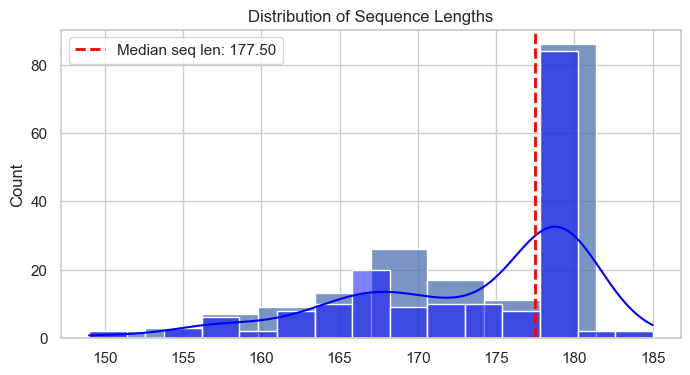

In [31]:
eda_obj.seq_lens_distrib()

### 2. Interactively explore each time-series variable and decompose it into trends, seasonality and residuals

In [32]:
# Create dropdown widget
dropdown = widgets.Dropdown(
    options= ts_cols,
    value="SPARGE_O2",
    description="Select Column:",
    style={'description_width': 'initial'})

# Use interact to link dropdown and plotting function
interact(eda_obj.plot_ts_data, column=dropdown)

interactive(children=(Dropdown(description='Select Column:', index=17, options=('AGIT', 'AGIT_SEAL_PRESS', 'DO…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

## Look at correlations

### 1. Bi-variate correlations

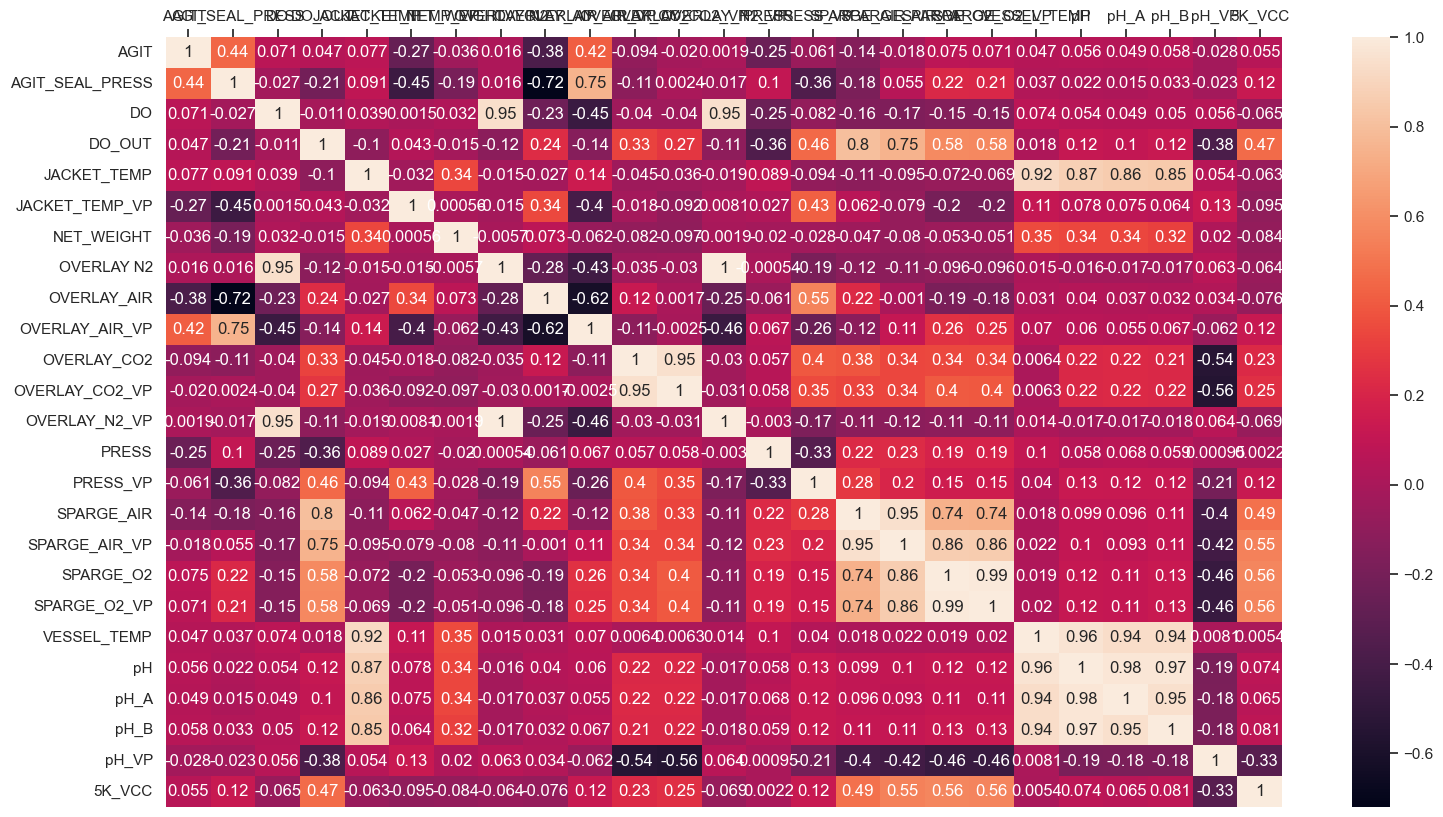

In [33]:
plt.figure(figsize=(18, 10))
ax = sns.heatmap(mv_ts[ts_cols].corr(), annot=True)
ax.xaxis.tick_top()

### 2. Correlation between the target variable and some meta-data variable

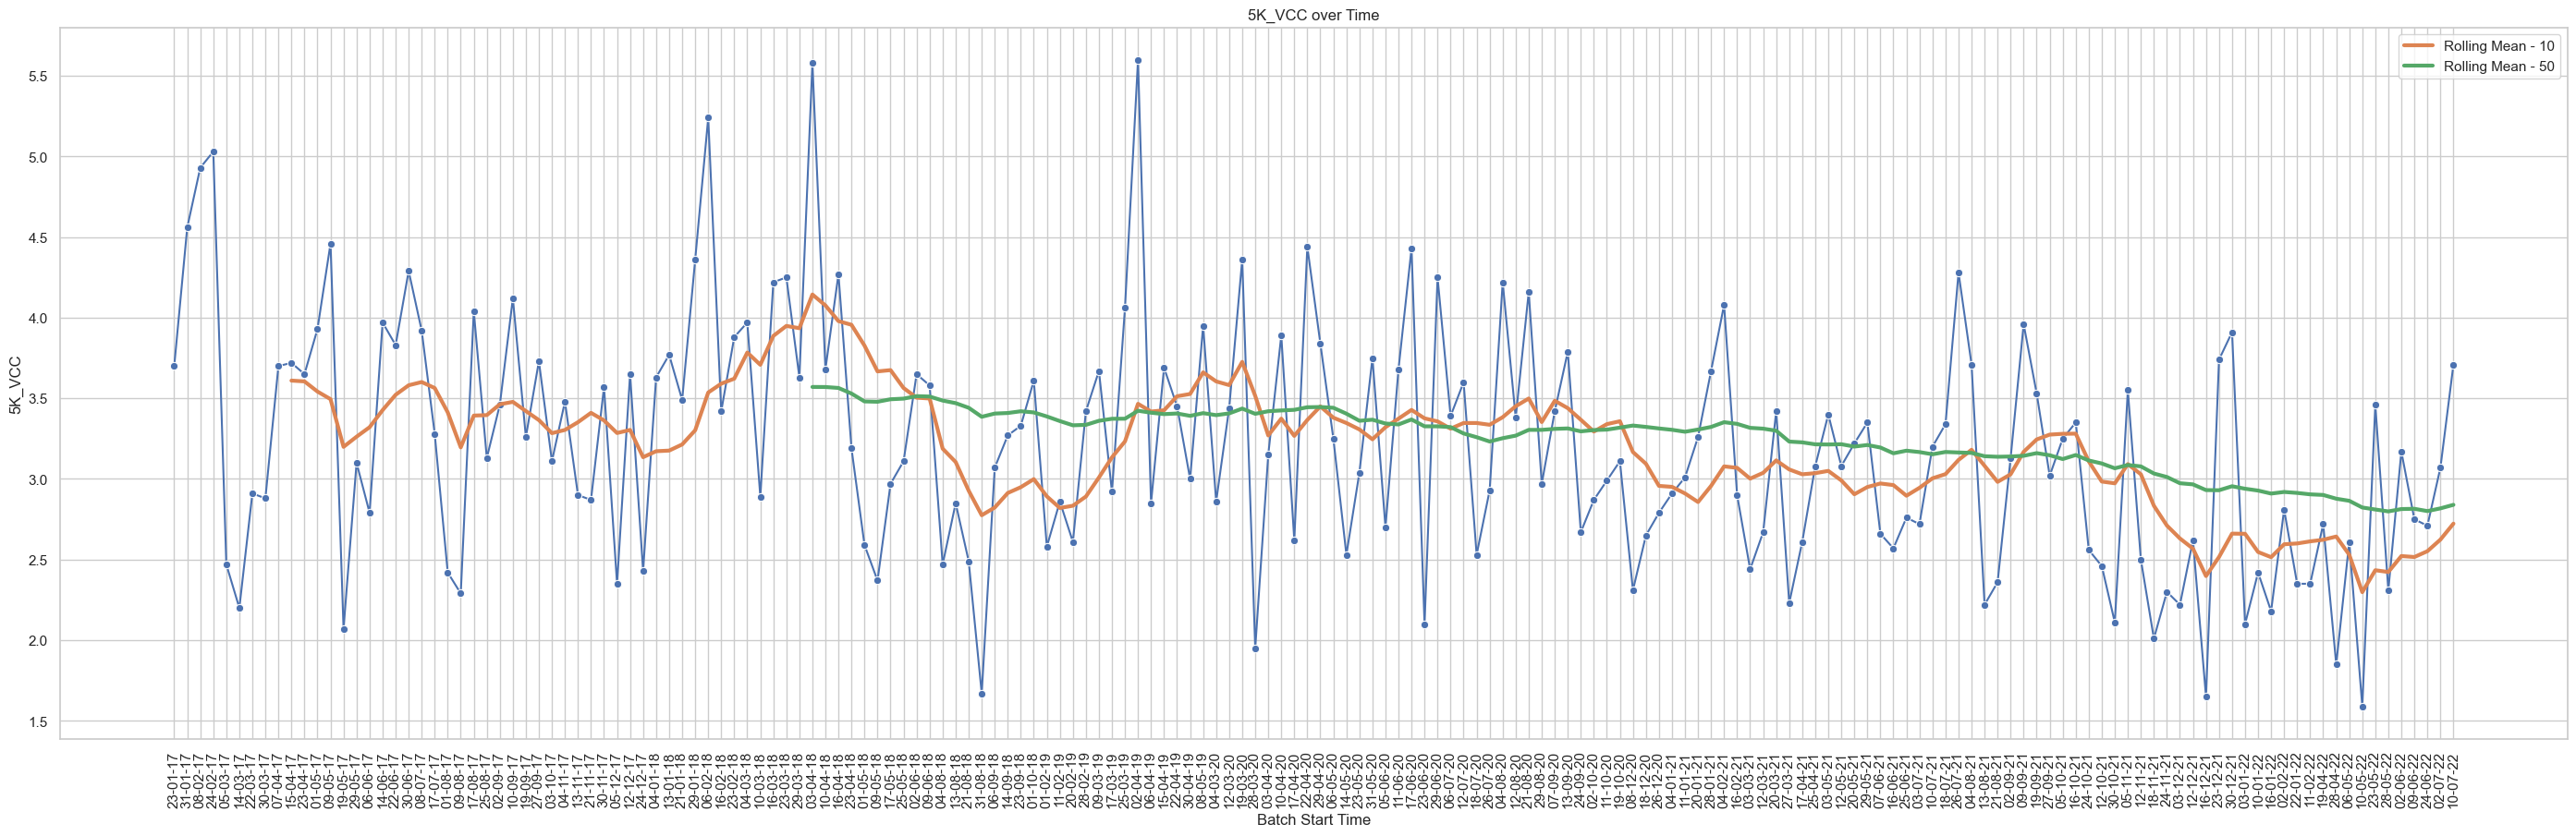

In [77]:
merged_df = eda_obj.batch_start_time_corr_with_yield()

<Axes: >

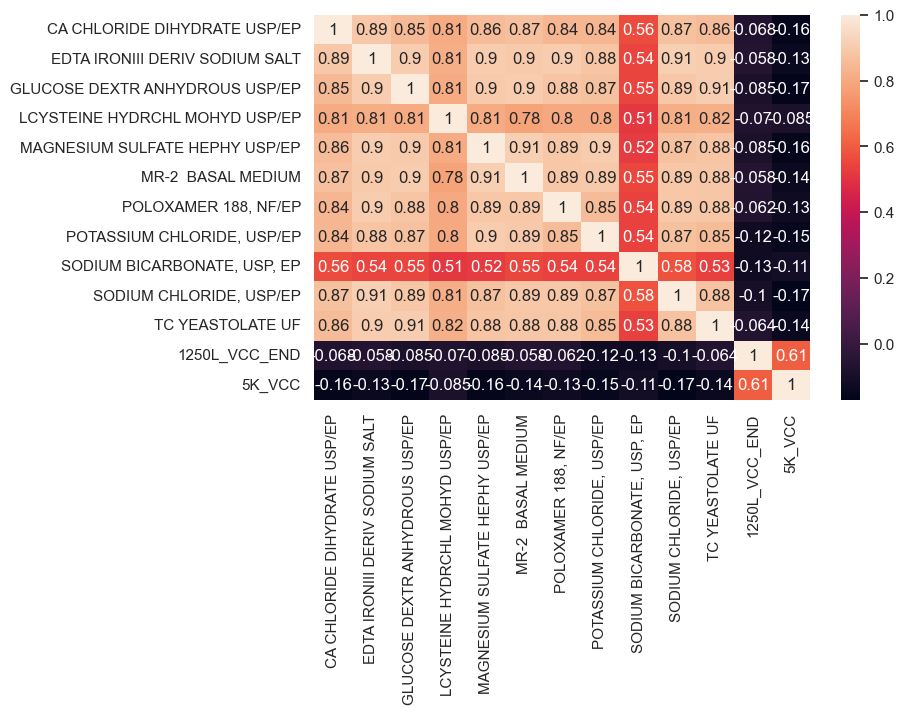

In [78]:
corr_cols = [c for c in merged_df.columns if c not in [config['seq_identifier_col'], 'START_TIME']]

plt.figure(figsize=(8, 5))
sns.heatmap(merged_df[corr_cols].corr(), annot=True)

## [TO DO] Pairplot

In [35]:
# sns.pairplot(mv_ts[ts_cols], corner=True)

## [To Do] Cluster similar time-series (based on meta data)